In [1]:
# Daniel Bandala @ apr 2022
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Principal Component Analysis
PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The $i-th$ principal component can be taken as a direction orthogonal to the first $i-1$ principal components that maximizes the variance of the projected data.

The principal components of a collection of points in a real coordinate space are a sequence of $p$ unit vectors, where the $i-th$ vector is the direction of a line that best fits the data while being orthogonal to the first $i-1$ vectors. Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line. These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

In [2]:
# read data into pandas dataframe
data_path = "wine.data"
data = pd.read_csv(data_path,sep=',',header=None)
X = data.iloc[:,1:data.shape[1]]
y = data.iloc[:,0]

In [3]:
# print statistic dataset information
X.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
# print covariance matrix with independent variables
print("Covariance matrix")
X.cov()

Covariance matrix


,1,2,3,4,5,6,7,8,9,10,11,12,13
1,0.659062,0.085611,0.047115,-0.841093,3.139878,0.146887,0.192033,-0.015754,0.063518,1.028283,-0.013313,0.041698,164.567185
2,0.085611,1.248015,0.050277,1.076332,-0.870780,-0.234338,-0.458630,0.040733,-0.141147,0.644838,-0.143326,-0.292447,-67.548867
3,0.047115,0.050277,0.075265,0.406208,1.122937,0.022146,0.031535,0.006358,0.001516,0.164654,-0.004682,0.000762,19.319739
4,-0.841093,1.076332,0.406208,11.152686,-3.974760,-0.671149,-1.172083,0.150422,-0.377176,0.145024,-0.209118,-0.656234,-463.355345
5,3.139878,-0.870780,1.122937,-3.974760,203.989335,1.916470,2.793087,-0.455563,1.932832,6.620521,0.180851,0.669308,1769.158700
6,0.146887,-0.234338,0.022146,-0.671149,1.916470,0.391690,0.540470,-0.035045,0.219373,-0.079998,0.062039,0.311021,98.171057
7,0.192033,-0.458630,0.031535,-1.172083,2.793087,0.540470,0.997719,-0.066867,0.373148,-0.399169,0.124082,0.558262,155.447492
8,-0.015754,0.040733,0.006358,0.150422,-0.455563,-0.035045,-0.066867,0.015489,-0.026060,0.040121,-0.007471,-0.044469,-12.203586
9,0.063518,-0.141147,0.001516,-0.377176,1.932832,0.219373,0.373148,-0.026060,0.327595,-0.033504,0.038665,0.210933,59.554334
10,1.028283,0.644838,0.164654,0.145024,6.620521,-0.079998,-0.399169,0.040121,-0.033504,5.374449,-0.276506,-0.705813,230.767480


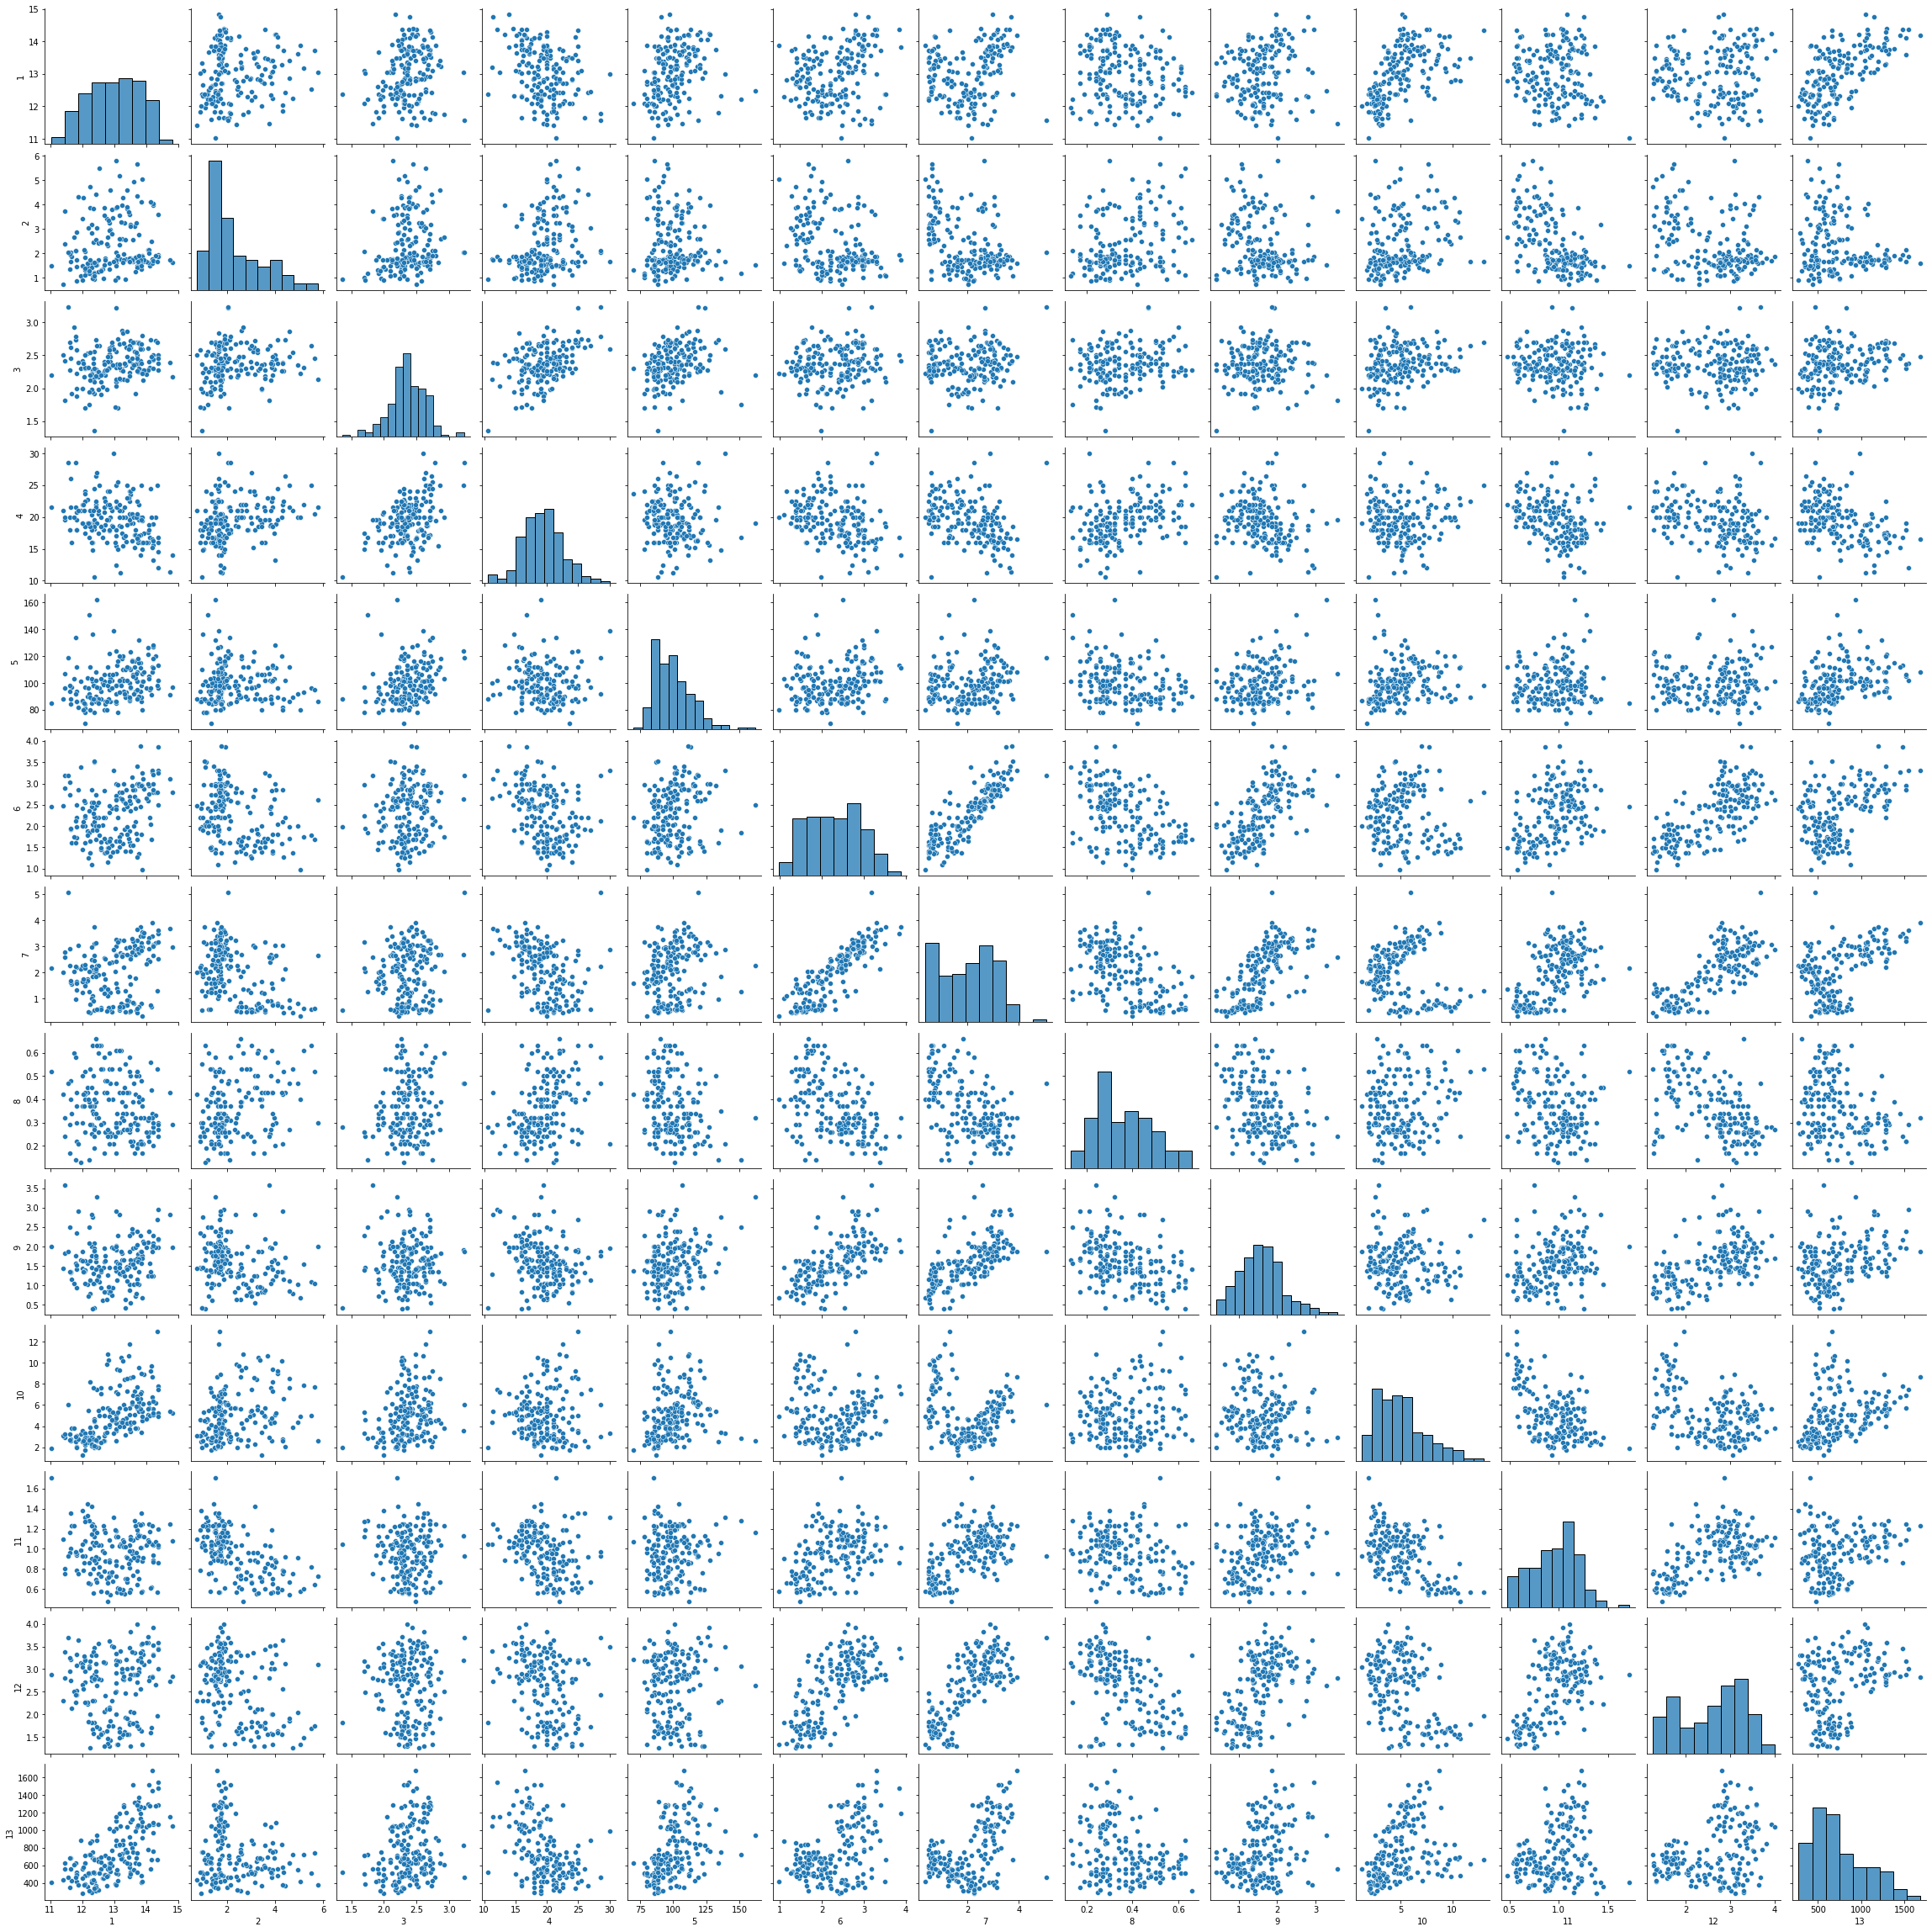

In [5]:
sns.pairplot(X)

In [6]:
# step 1: normalize data
X_norm = (X-X.mean())/X.var()

In [7]:
# step 2: calculate covariance matrix
cov_matrix = X_norm.cov().to_numpy()
# step 3: estimate eigen values and vectors
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
# step 4: sort eigen values in descending order
sorting_idxs = np.flip(eigen_values.argsort())
eigen_values = eigen_values[sorting_idxs]
eigen_vectors = eigen_vectors[sorting_idxs]
# normalize eigen value
eigen_values_norm = eigen_values/np.sum(eigen_values)

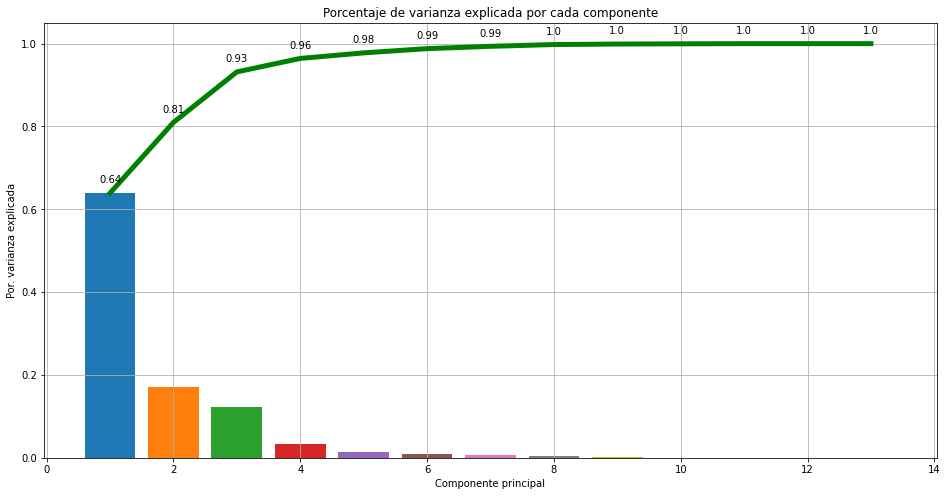

In [8]:
cumulative = 0
cumu_points = []
plt.figure(figsize=(16,8))
for i in range(len(eigen_values_norm)):
    plt.bar(i+1,eigen_values_norm[i])
    cumulative = cumulative+eigen_values_norm[i]
    cumu_points.append(cumulative)
    plt.annotate(
        round(cumulative,2),
        (i+1,cumulative),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
plt.plot(np.linspace(1,len(eigen_values_norm),len(eigen_values_norm)), cumu_points, 'g-', linewidth=5)
plt.title('Porcentaje de varianza explicada por cada componente')
plt.xlabel('Componente principal')
plt.ylabel('Por. varianza explicada');
plt.grid()

In [9]:
# step 5-6: select first k eigen vectors and construct projection matrix
k = 4
W = np.array([eigen_vectors[i] for i in range(min(len(eigen_values),k))])

In [10]:
# step 7: calculate new data projected on principal components space
data_pca = np.dot(X,W.T)

In [11]:
# convert new dataframe
dataframe_pca = pd.DataFrame(data_pca)

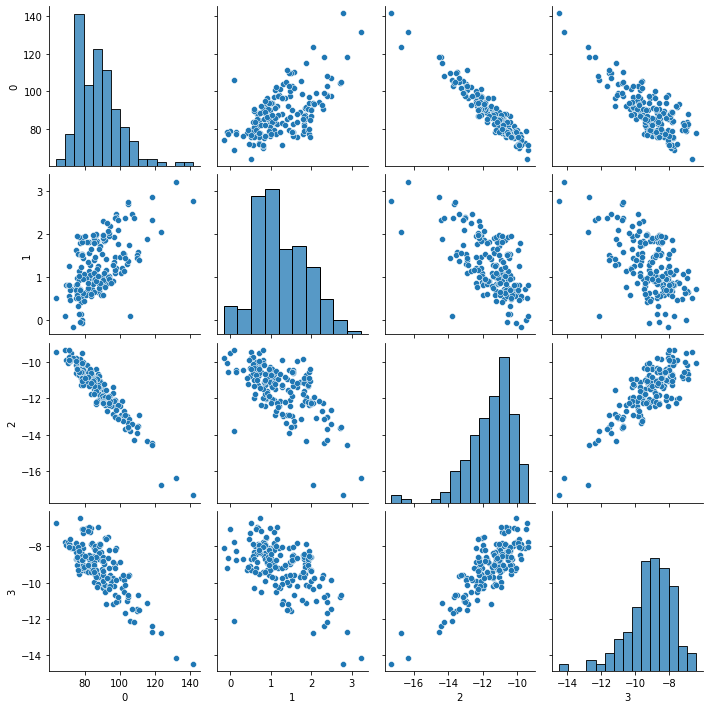

In [12]:
# correletation between new components
sns.pairplot(dataframe_pca)

## Using Sklearn library

In [13]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [14]:
# define PCA parameters
pca = PCA(n_components=6)
# fit with dataset
pca.fit(X_norm)

PCA(n_components=6)

In [15]:
print("Variance ratio: ",pca.explained_variance_ratio_)
print("\nSingular values: ",pca.singular_values_)
print("\nComponents: ",pca.components_)

Variance ratio:  [0.6391973  0.17048332 0.12202397 0.0325507  0.01342074 0.01021812]

Singular values:  [110.63191607  57.13522069  48.33765195  24.96566642  16.03065027
  13.98777191]

Components:  [[-2.09608589e-02  3.89032472e-02  9.59751281e-02  1.44880565e-02
  -2.04624903e-03 -9.76367797e-02 -7.25658131e-02  9.57240614e-01
  -8.71383883e-02  1.06151665e-02 -2.00950184e-01 -9.70915046e-02
  -1.26515889e-04]
 [-3.33426115e-02 -9.81062829e-02  4.44013651e-02 -9.03295195e-03
  -4.37214511e-04  1.28075043e-01  9.64481185e-02  2.39024840e-01
   9.25849436e-02 -4.69542662e-02  9.34210000e-01  1.44384277e-01
   1.12842384e-04]
 [-1.02771219e-01 -2.90362586e-02 -9.72870058e-01 -2.84020651e-02
  -6.85710264e-03 -1.27957332e-01 -7.73025185e-02  7.84901626e-02
  -7.14909414e-02 -3.24437769e-02  5.87930189e-02 -5.59946823e-02
  -2.91565580e-04]
 [ 1.63062555e-01  1.33040749e-03 -1.72868745e-01 -3.23835362e-02
   1.58831089e-03  4.96496264e-01  2.55072979e-01  1.34875506e-01
   6.97960214e-01 

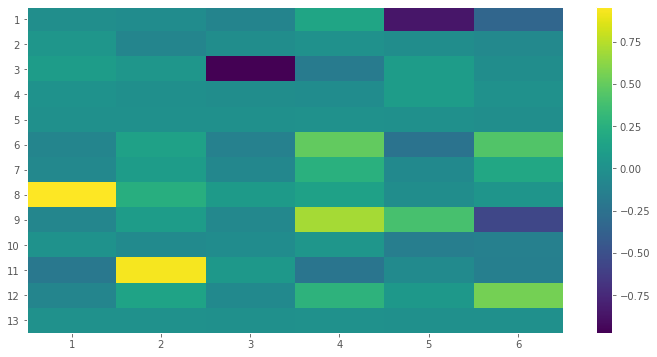

In [16]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(len(componentes)), np.arange(pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.6391973  0.17048332 0.12202397 0.0325507  0.01342074 0.01021812]


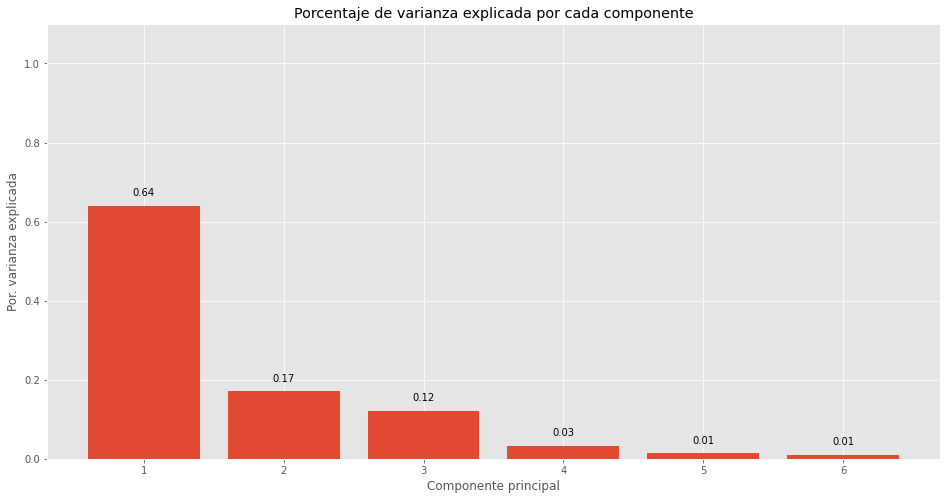

In [17]:
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.6391973  0.80968062 0.93170459 0.96425529 0.97767603 0.98789415]


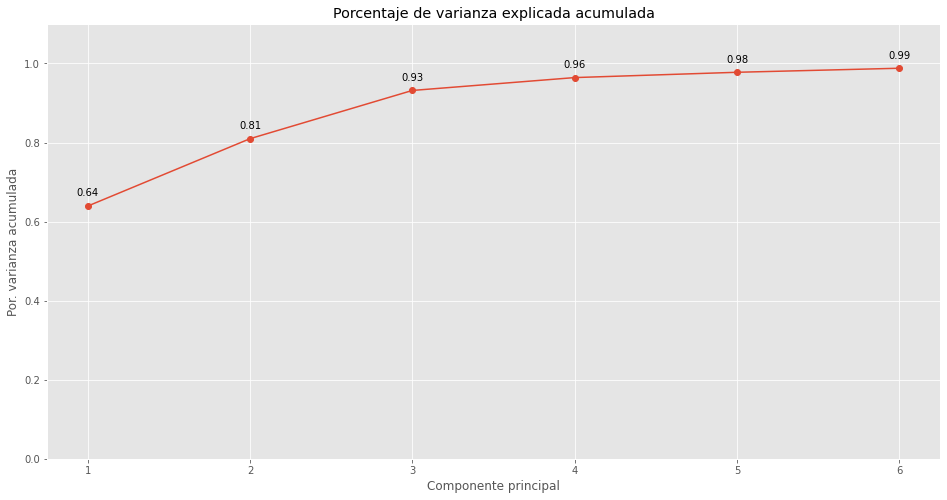

In [18]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
ax.plot(
    np.arange(len(componentes)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');